In [0]:
print("Dani Andhika Permana    |  1301180174")
print("Annisya Hayati Suhendar |  1301180013")
print("Fariz Muhammad Rizky    |  1301184327")

Dani Andhika Permana    |  1301180174
Annisya Hayati Suhendar |  1301180013
Fariz Muhammad Rizky    |  1301184327


In [0]:
#Instalasi library celluloid untuk animasi plots
pip install celluloid

Hari yang dibutuhkan untuk imun semua :  45


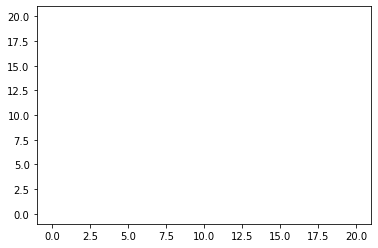

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from matplotlib import animation, rc
from IPython.display import HTML
from numpy import random

fig = plt.figure()
camera = Camera(fig)

#Inisialisasi
x = []                    #posisi
y = []                    #posisi
status = []
jumlah_sakit = 0
sakit = []                #Graph
hari = []                 #Graph
populasi = 200
probabilitas_jalan = 0.8  #80% dari 0-1
rasio_terinfeksi = 5      #5%  dari 1-100
waktu_pemulihan = 10
recovery = []             #Lamanya terinfeksi

#plotting titik dan status terinfeksi di awal
for i in range(populasi):
  x_sakit = []                      #titik berwarna merah/ sakit
  y_sakit = []                      #titik berwarna merah/ sakit
  x_sehat = []                      #titik berwarna biru / sehat
  y_sehat = []                      #titik berwarna biru / sehat
  acakX = random.randint(20)
  x.append(acakX)
  acakY = random.randint(20)
  y.append(acakY)
  rasio = (random.randint(1,100))
  if rasio <= rasio_terinfeksi:
    stat = "sakit"
    status.append(stat)
    x_sakit.append(acakX)
    y_sakit.append(acakY)
    jumlah_sakit += 1
    recovery.append(1)
  else:
    stat = "sehat"
    status.append(stat)
    x_sehat.append(acakX)
    y_sehat.append(acakY)
    recovery.append(0)

hari_ke = 1
hari.append(hari_ke)
sakit.append(jumlah_sakit)

plt.plot(x_sakit, y_sakit, 'ro')
plt.plot(x_sehat, y_sehat, 'bo') 

#Hari terus berjalan sampai semua pulih/imun
while jumlah_sakit > 0:
  '''
  print("hari ke "+str(hari_ke))
  print("jumlah yang Terinfeksi: "+str(jumlah_sakit))
  '''
  for i in range(populasi):
    x_sakit = []
    y_sakit = []
    x_sehat = []
    y_sehat = []

    #plotting probabilitas bergerak 4 arah
    probabilitas = (random.uniform(0,1))  
    if probabilitas >= probabilitas_jalan:
      arah = (random.uniform(0,1))
      if arah <= 0.25:          #bergerak ke kanan
        x[i] = x[i-1] + 1
        y[i] = y[i-1]
      elif arah <= 0.5:         #bergerak ke kiri
        x[i] = x[i-1] - 1
        y[i] = y[i-1]
      elif arah <= 0.75:        #bergerak ke atas
        x[i] = x[i-1]
        y[i] = y[i-1] + 1
      elif arah <= 1:           #bergerak ke bawah
        x[i] = x[i-1]
        y[i] = y[i-1] - 1
      
      #Ukuran ruang simulasi tidak melebihi 20x20
      if x[i] > 20:             
        x[i] = x[i] - 1
      elif x[i] < 0:
        x[i] = x[i] + 1
      elif y[i] > 20:
        y[i] = y[i] - 1
      elif y[i] < 0:
        y[i] = y[i] + 1

      #Pengecekan penyebaran virus
      for j in range(populasi):                
        if j != i:
          if x[j] == x[i] and y[j] == y[i]:
            if status[j] != "sakit" and status[j] != "imun":
              if status[i] == "sakit":
                status[j] = "sakit"
                recovery[j] = 1
                jumlah_sakit += 1
            elif status[j] == "sakit":
              if status[i] == "sehat":
                status[i] = "sakit"
                recovery[i] = 1
                jumlah_sakit += 1

    #Pengecekan perubahan status sakit menjadi imun            
    if status[i] == "sakit":
      if recovery[i] <= waktu_pemulihan:
        recovery[i] += 1
        x_sakit.append(x[i])
        y_sakit.append(y[i])
      else:
        status[i] = "imun"
        jumlah_sakit -= 1
        x_sehat.append(x[i])
        y_sehat.append(y[i])
    else:
      x_sehat.append(x[i])
      y_sehat.append(y[i])
     
    plt.plot(x_sakit, y_sakit, 'ro') 
    plt.plot(x_sehat, y_sehat, 'bo')
        
  hari_ke += 1
  hari.append(hari_ke)
  sakit.append(jumlah_sakit)
  camera.snap()

print("Hari yang dibutuhkan untuk imun semua : ", max(hari))

#animasi plots
animation_plot = camera.animate()
animation_plot.save('plots.mp4')
rc('animation', html='jshtml')
animation_plot

In [0]:
#animasi graph
fig, ax = plt.subplots()
plt.close()

ax.set_xlim((0, len(hari)+20))
ax.set_ylim((0, len(sakit)+20))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

arrX = []
arrY = []

def animate(i):
    if i < len(hari):
      xi = hari[i]
      yi = sakit[i]
    else:
      xi = hari[len(hari)-1]
      yi = sakit[len(hari)-1]
    arrX.append(xi)
    arrY.append(yi)
    line.set_data(arrX, arrY)
    return (line,)
  

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=100, interval=100, blit=True)

rc('animation', html='jshtml')
anim

Hari yang dibutuhkan untuk imun semua : 45


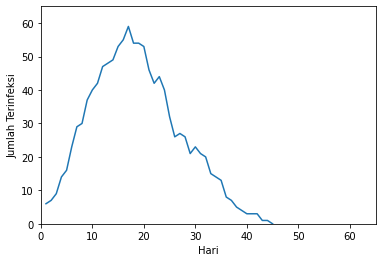

In [0]:
#graph gambar
print("Hari yang dibutuhkan untuk imun semua : "+str(hari_ke))

plt.plot(hari, sakit)
plt.xlabel('Hari') 
plt.ylabel('Jumlah Terinfeksi') 
plt.xlim((0, len(hari)+20))
plt.ylim((0, len(sakit)+20))
plt.show()

In [0]:
#Data yang terinfeksi setiap harinya
for i in range(len(sakit)):
  print("Hari ke "+str(hari[i]))
  print("Jumlah yang Terinfeksi: "+str(sakit[i]))
  print("")

Hari ke 1
Jumlah yang Terinfeksi: 6

Hari ke 2
Jumlah yang Terinfeksi: 7

Hari ke 3
Jumlah yang Terinfeksi: 9

Hari ke 4
Jumlah yang Terinfeksi: 14

Hari ke 5
Jumlah yang Terinfeksi: 16

Hari ke 6
Jumlah yang Terinfeksi: 23

Hari ke 7
Jumlah yang Terinfeksi: 29

Hari ke 8
Jumlah yang Terinfeksi: 30

Hari ke 9
Jumlah yang Terinfeksi: 37

Hari ke 10
Jumlah yang Terinfeksi: 40

Hari ke 11
Jumlah yang Terinfeksi: 42

Hari ke 12
Jumlah yang Terinfeksi: 47

Hari ke 13
Jumlah yang Terinfeksi: 48

Hari ke 14
Jumlah yang Terinfeksi: 49

Hari ke 15
Jumlah yang Terinfeksi: 53

Hari ke 16
Jumlah yang Terinfeksi: 55

Hari ke 17
Jumlah yang Terinfeksi: 59

Hari ke 18
Jumlah yang Terinfeksi: 54

Hari ke 19
Jumlah yang Terinfeksi: 54

Hari ke 20
Jumlah yang Terinfeksi: 53

Hari ke 21
Jumlah yang Terinfeksi: 46

Hari ke 22
Jumlah yang Terinfeksi: 42

Hari ke 23
Jumlah yang Terinfeksi: 44

Hari ke 24
Jumlah yang Terinfeksi: 40

Hari ke 25
Jumlah yang Terinfeksi: 32

Hari ke 26
Jumlah yang Terinfeksi: 26